# Hierarchical Clustering

## Agglomerative Clustering


Agglomerative Clustering is a type of hierarchical clustering. It's a bottom up approach to clustering data. Initially n datapoints are created as n clusters with each data point in a cluster of it's own. Then for each cluster, say $C_i$, the data point is compared with the nearest point. Pairs of data points which are nearest to each other are grouped together to form clusters. They are then combined in to one cluster. This process is done iteratively, thus the clusters are grouped together one by one based on nearness criterion. This method is followed until a heirarchy or a tree of clusters is formed and we get back all the data merged to form a root. Then a cut is taken at any point to visualize the groupings or cluster associations of each data point. 

### Using Scipy

In order to perform agglomerative clustering, we need to import two functions from the scipy.cluster.hierarchy library - dendrogram and linkage. The linkage function is the main function which calculates the distances between every combination of data points within the given data set, using the specified method and metric (Eg. linkage(data_set, method_of_distance_measurement, metric)). These distances so calculated are to be stored in a matrix. This function automatically classifies the data points into clusters with each iteration, merging data points/clusters which are closest to each other.

```python
from scipy.cluster.hierarchy import dendrogram, linkage

clust_dist = linkage(moon_df, 'average', 'euclidean')
```

### Dendrogram

A dendrogram is a tree like structure which displays the clusters formed at each step. To visulize the clusters at any step, you need to take a cut. It provides a lot of information in terms of which data points were merged at that cut. A horizontal line in the dendrogram denotes the occurence of that cut and a merge. The vertical lines dropping from the ends of the horizontal line, point to the clusters (or data points) which were merged. The length of the vertical line (also referred to as height of the horizontal line) denotes the distance covered from the cluster. In subsequent iterations/merges, we can observe that the heights are different, because the distance between one cluster and the resulting cluster may not be the same.


<br/>

## Exercise:

Use the dendrogram function to show the agglomerative clustering performed on the dataset.

```python
DF = dendrogram(
    clust_dist,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/06/20/dendo-all.png'/>


The dendrogram shown can be truncated to show the last few merged clusters. 

- Truncate the dendogram to show last 12 merged clusters. Use the parameters:
 - truncate_mode='lastp',  # show only the last p merged cluster
 - p=12,  # show only the last p merged clusters
 - show_leaf_counts=True,  # otherwise numbers in brackets are counts

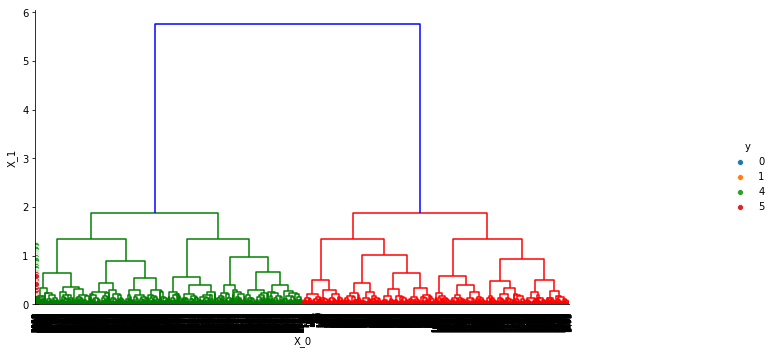

In [42]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# defining N, D and K

N_Samples = 1000
D = 2 
K = 4

X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 4
y_vec += 4
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

# converting the data set into a data frame and displaying the plot
moon_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()

# Calculating linkages among data points
clust_dist = linkage(moon_df, 'average', 'euclidean')

# Modify the code below 
DF = dendrogram(
clust_dist,
leaf_rotation=90., # rotates the x axis labels
leaf_font_size=8., # font size for the x axis labels
)


### Solution

```python
DF = dendrogram(
clust_dist,
truncate_mode='lastp', # show only the last p merged clusters
p=12, # show only the last p merged clusters
show_leaf_counts=True, # otherwise numbers in brackets are counts
leaf_rotation=90.,
leaf_font_size=12.,
show_contracted=True, # to get a distribution impression in truncated branches
)
```


<br/><br/><br/>
## The Cut - Agglomerative Clustering

In the above dendrogram we can see that we truncated the agglomerative clustering iterations at a point where we can see that all data points were merged to formed 12 different clusters. We can now look up the clusters using 'fcluster' method from "scipy.cluster.heirarchy" library. To visualize what data points are associated with each cluster, import the library:

```python
from scipy.cluster.hierarchy import fcluster
k = 12
labels = fcluster(clustdist, k, criterion='maxclust')
```

To visualize the labels and verify the length,

```python
labels, len(labels)
(array([11, 11, 11, ...,  4,  4,  4], dtype=int32), 4000)
```

<br/>

## Exercise:

 - Visualize the cluster and assign the cluster labels to the column 'agglo'

In [43]:
from scipy.cluster.hierarchy import fcluster

# Calculating linkages among data points
clust_dist = linkage(moon_df, 'average', 'euclidean')

k = 4
labels = fcluster(clust_dist, k, criterion='maxclust')



### Solution

```python
moon_df['agglo'] = labels
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="agglo", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()
```

## Using sklearn library

The sklearn library has a module sklearn.cluster.AgglomerativeClustering that provides algorithms for Agglomerative clustering.

This provides options for n_clusters and linkage methods to be specified.

Here is the sample code to use for clustering make_moons dataset.

```python
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)


clustering = AgglomerativeClustering().fit(noisy_moons)
clustering 



noisy_moons['sklearn_agglo'] = clustering.labels_
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="sklearn_agglo", data = noisy_moons)
g.fig.set_size_inches(14, 6)
sns.despine()
```

The linkage parameter can take one of “ward”, “complete”, “average” as the value. It can also take “single” as a value for latest versions of sklearn library (v0.21.2 onwards).

### Exercise

Use sklearn's AgglomerativeClustering to cluster make_blobs dataset. Use 3 clusters and linkage as 'ward'.

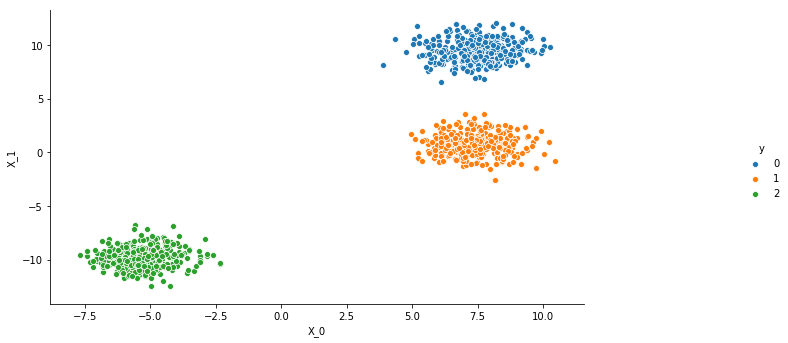

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

import numpy as np

N_Samples = 1000

X, y = datasets.make_blobs(n_samples=N_Samples, random_state=8)

# converting the data set into a data frame and displaying the plot
blob_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()


#Write your code for agglomerative clustering

### Solution

```python
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering 
blob_df['sklearn_agglo'] = clustering.labels_
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="sklearn_agglo", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()

```

The above clustering was more or less accurate, since there isn't much overlap among the clusters.
Let us try AgglomerativeClustering for IRIS dataset.

### Exercise

In this exercise, use the iris dataset after train-test split, cluster the dataset using AgglomerativeClustering from sklearn library. Fix the best linkage option after trying different options.  

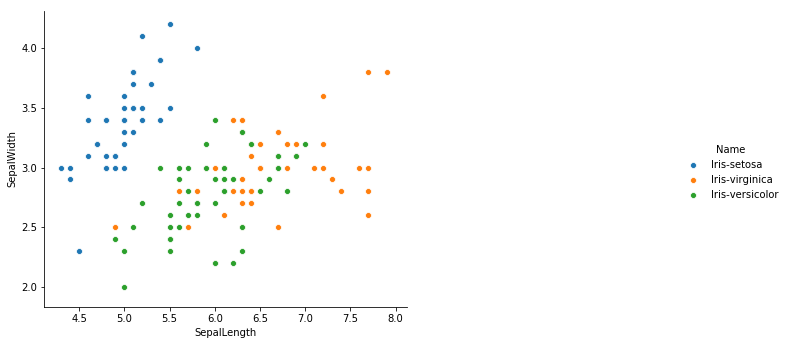

In [45]:
from sklearn.cross_validation import train_test_split

iris = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

iris_train, iris_test = train_test_split(iris, train_size=0.9)

g = sns.pairplot(x_vars="SepalLength", y_vars="SepalWidth", hue="Name", data = iris_train)
g.fig.set_size_inches(14, 6)




### Solution

```python
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(iris_train[features])
iris_train = iris_train.assign(cluster = agglo.labels_)
iris_train.head(5)

g = sns.pairplot(x_vars="SepalLength", y_vars="SepalWidth", hue="cluster", data = iris_train)
g.fig.set_size_inches(14, 6)
```